## Performing Univariate Selection Backward Elimination And Recursive Feature Elimination

[Data](https://www.kaggle.com/altavish/boston-housing-dataset) and [Description](https://www.kaggle.com/c/boston-housing/overview/description)

https://www.kaggle.com/altavish/boston-housing-dataset
We use a modified version of the Boston housing dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### Load and read datasets 

In [2]:
house_data = pd.read_csv('datasets/HousingData.csv')

### Shape of datasets

In [3]:
house_data.shape

(506, 12)

### View, sample of datasets

In [4]:
house_data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24,666,20.2,13.8
381,15.87440,0.0,18.10,0.0,0.671,6.545,99.1,1.5192,24,666,20.2,10.9
89,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2,270,17.8,28.7
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3,193,17.8,39.8
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,24.5
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4,277,18.6,28.1
143,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5,403,14.7,15.6
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4,334,22.0,18.2
184,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3,193,17.8,26.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,20.6


In [5]:
col_names = ['CrimeRate', 'ZonedRatio', 'IndusRatio', 
             'AlongRiver', 'NO2Level', 'RoomsPerHouse', 
             'OldHomeRatio', 'DisFromCenter', 'RoadAccessIndex', 
             'PropTaxRate', 'PupilTeacherRatio', 'MedianHomeValue']

In [6]:
house_data.columns = col_names

house_data.sample(5)

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8,284,19.7,19.6
53,NaN,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4,243,16.8,23.4
179,0.05780,0.0,2.46,0.0,0.488,6.980,58.4,2.8290,3,193,17.8,37.2
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24,666,20.2,13.1
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5,264,13.0,43.5


### Information about datasets

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CrimeRate          486 non-null    float64
 1   ZonedRatio         486 non-null    float64
 2   IndusRatio         486 non-null    float64
 3   AlongRiver         486 non-null    float64
 4   NO2Level           506 non-null    float64
 5   RoomsPerHouse      506 non-null    float64
 6   OldHomeRatio       486 non-null    float64
 7   DisFromCenter      506 non-null    float64
 8   RoadAccessIndex    506 non-null    int64  
 9   PropTaxRate        506 non-null    int64  
 10  PupilTeacherRatio  506 non-null    float64
 11  MedianHomeValue    506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


### Replace all `NA` values with `NaN` and then use forward fill `ffill`

In [8]:
house_data = house_data.replace('NA', np.nan)

In [9]:
house_data.isnull().sum().sort_values(ascending=False)

CrimeRate            20
ZonedRatio           20
IndusRatio           20
AlongRiver           20
OldHomeRatio         20
NO2Level              0
RoomsPerHouse         0
DisFromCenter         0
RoadAccessIndex       0
PropTaxRate           0
PupilTeacherRatio     0
MedianHomeValue       0
dtype: int64

In [10]:
data = house_data.fillna(house_data.mean())

In [11]:
data.head()

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


### Again checking for `NaN` values

In [12]:
data.isnull().sum()

CrimeRate            0
ZonedRatio           0
IndusRatio           0
AlongRiver           0
NO2Level             0
RoomsPerHouse        0
OldHomeRatio         0
DisFromCenter        0
RoadAccessIndex      0
PropTaxRate          0
PupilTeacherRatio    0
MedianHomeValue      0
dtype: int64

### Describe the features

In [13]:
data.describe()

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


In [14]:
data.sample(10)

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
346,0.06162,0.0,4.390000,0.000000,0.442,5.898,52.3,8.0136,3,352,18.8,17.2
124,0.09849,0.0,25.650000,0.000000,0.581,5.879,95.8,2.0063,2,188,19.1,18.8
121,0.07165,0.0,25.650000,0.000000,0.581,6.004,84.1,2.1974,2,188,19.1,20.3
130,0.34006,0.0,21.890000,0.000000,0.624,6.458,98.9,2.1185,4,437,21.2,19.2
177,0.05425,0.0,11.083992,0.000000,0.510,6.315,73.4,3.3175,5,296,16.6,24.6
381,15.87440,0.0,18.100000,0.000000,0.671,6.545,99.1,1.5192,24,666,20.2,10.9
372,8.26725,0.0,18.100000,1.000000,0.668,5.875,89.6,1.1296,24,666,20.2,50.0
21,0.85204,0.0,8.140000,0.000000,0.538,5.965,89.2,4.0123,4,307,21.0,19.6
239,0.09252,30.0,4.930000,0.000000,0.428,6.606,42.2,6.1899,6,300,16.6,23.3
367,13.52220,0.0,18.100000,0.069959,0.631,3.863,100.0,1.5106,24,666,20.2,23.1


### Shape of datasets

In [15]:
data.shape

(506, 12)

### Selecting features and target values

In [16]:
target = data['MedianHomeValue']

features = data.drop('MedianHomeValue', axis=1)

### Shape of features and target         

In [17]:
features.shape, target.shape

((506, 11), (506,))

#### Visualize the feature correlations

In [18]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


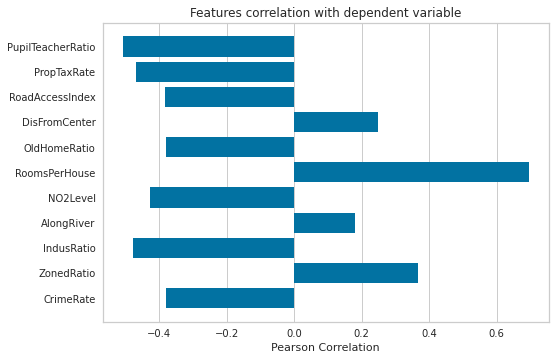

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [19]:
visualizer = FeatureCorrelation(labels = feature_names)

visualizer.fit(features, target)

visualizer.poof()

### Importing Univariate feature selection class and methods

In [20]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

In [21]:
select_univariate = SelectKBest(f_regression, k=5).fit(features, target)

#### Which of the features have been selected?

In [22]:
feature_mask = select_univariate.get_support()

feature_mask

array([False, False,  True, False,  True,  True, False, False, False,
        True,  True])

### 1. Univariate features

https://scikit-learn.org/stable/modules/feature_selection.html

In [23]:
features.columns[feature_mask]

Index(['IndusRatio', 'NO2Level', 'RoomsPerHouse', 'PropTaxRate',
       'PupilTeacherRatio'],
      dtype='object')

In [24]:
select_univariate.scores_

array([ 84.90107412,  77.9285999 , 149.79218706,  16.85363275,
       112.59148028, 471.84673988,  85.17727935,  33.57957033,
        85.91427767, 141.76135658, 175.10554288])

In [25]:
pd.DataFrame({'FeatureName': features.columns, 
              'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                               ascending=False)

,FeatureName,Score
5,RoomsPerHouse,471.846740
10,PupilTeacherRatio,175.105543
2,IndusRatio,149.792187
9,PropTaxRate,141.761357
4,NO2Level,112.591480
8,RoadAccessIndex,85.914278
6,OldHomeRatio,85.177279
0,CrimeRate,84.901074
1,ZonedRatio,77.928600
7,DisFromCenter,33.579570


In [26]:
uni_df = pd.DataFrame({'Univariate Method': features.columns[feature_mask]})

uni_df

,Univariate Method
0,IndusRatio
1,NO2Level
2,RoomsPerHouse
3,PropTaxRate
4,PupilTeacherRatio


### Score of selected five features

### 2. Import RFE and LinearRegression

Use Recursive Feature extraction to extract features

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linear_regression = LinearRegression()

In [28]:
rfe = RFE(estimator = linear_regression, 
          n_features_to_select = 5, 
          step = 1)

In [29]:
rfe.fit(features,target)

RFE(estimator=LinearRegression(), n_features_to_select=5)

### Selected features, according to RFE Ranking

In [30]:
rfe_features = features.columns[rfe.support_]

rfe_features

Index(['AlongRiver', 'NO2Level', 'RoomsPerHouse', 'DisFromCenter',
       'PupilTeacherRatio'],
      dtype='object')

#### View rankings of all the features
The selected features are assigned a rank of 1

In [31]:
pd.DataFrame({'FeatureName': features.columns, 
              'Rank': rfe.ranking_}).sort_values(by='Rank')

,FeatureName,Rank
3,AlongRiver,1
4,NO2Level,1
5,RoomsPerHouse,1
7,DisFromCenter,1
10,PupilTeacherRatio,1
2,IndusRatio,2
0,CrimeRate,3
8,RoadAccessIndex,4
6,OldHomeRatio,5
1,ZonedRatio,6


In [32]:
rfe_df = pd.DataFrame({'RFE Method': rfe_features})

rfe_df

,RFE Method
0,AlongRiver
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


### 3. Backward feature selection
* In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

### Import libraries 

In [36]:
!pip3 install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 6.3 MB/s eta 0:00:01


In [37]:
!pip3 install joblib --upgrade

Requirement already up-to-date: joblib in /usr/local/lib/python3.8/dist-packages (1.0.1)


### Import SequentialFeatureSelector and set forward as False for Backward and True for forward selection
http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
* __Backward Selection__

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [39]:
feature_selector = SequentialFeatureSelector(LinearRegression(),  
                                             k_features=5,
                                             forward=False,
                                             scoring='neg_mean_squared_error',
                                             cv=4)

In [40]:
feature_filtered = feature_selector.fit(features, target)

### Selected Backward selecter features names

In [41]:
backward_features = list(feature_filtered.k_feature_names_)
backward_features

['ZonedRatio',
 'NO2Level',
 'RoomsPerHouse',
 'DisFromCenter',
 'PupilTeacherRatio']

In [42]:
back_df = pd.DataFrame({'Backward Method': backward_features})

back_df

,Backward Method
0,ZonedRatio
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


### 4. Forward feature selection
* Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [43]:
feature_selector = SequentialFeatureSelector(LinearRegression(),  
                                             k_features=5,
                                             forward=True,
                                             scoring='neg_mean_squared_error',
                                             cv=4)


In [44]:
feature_filtered = feature_selector.fit(features, target)

### Selected Forward selecter feature names

In [45]:
forward_features = list(feature_filtered.k_feature_names_)
forward_features

['ZonedRatio',
 'IndusRatio',
 'RoomsPerHouse',
 'OldHomeRatio',
 'PupilTeacherRatio']

In [46]:
forw_df = pd.DataFrame({'Forward Method': forward_features})

forw_df

,Forward Method
0,ZonedRatio
1,IndusRatio
2,RoomsPerHouse
3,OldHomeRatio
4,PupilTeacherRatio


## 5. Regularization technique for feature selection 

In [47]:
from sklearn.linear_model import  Lasso

In [48]:
lasso = Lasso(alpha=1.0)

lasso.fit(features, target)

Lasso()

In [49]:
lasso_coef = pd.DataFrame({'Feature': features.columns, 
                           'LassoCoef': lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                  ascending =False)
lasso_coef

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
8,RoadAccessIndex,0.195388
1,ZonedRatio,0.042629
3,AlongRiver,0.000000
4,NO2Level,-0.000000
9,PropTaxRate,-0.016605
6,OldHomeRatio,-0.046299
2,IndusRatio,-0.087830
0,CrimeRate,-0.160247
7,DisFromCenter,-0.636740


In [50]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])

lasso_coef.sort_values(by='LassoCoef', ascending=False)

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
10,PupilTeacherRatio,0.737281
7,DisFromCenter,0.636740
8,RoadAccessIndex,0.195388
0,CrimeRate,0.160247
2,IndusRatio,0.087830
6,OldHomeRatio,0.046299
1,ZonedRatio,0.042629
9,PropTaxRate,0.016605
3,AlongRiver,0.000000


In [51]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(5)

lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})

lasso_df

,Lasso Method
0,RoomsPerHouse
1,PupilTeacherRatio
2,DisFromCenter
3,RoadAccessIndex
4,CrimeRate


In [52]:
comp_selected_col_df = [uni_df, 
                        rfe_df, 
                        back_df, 
                        forw_df, 
                        lasso_df]

final_df = pd.concat(comp_selected_col_df, axis=1)

In [53]:
final_df

,Univariate Method,RFE Method,Backward Method,Forward Method,Lasso Method
0,IndusRatio,AlongRiver,ZonedRatio,ZonedRatio,RoomsPerHouse
1,NO2Level,NO2Level,NO2Level,IndusRatio,PupilTeacherRatio
2,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,DisFromCenter
3,PropTaxRate,DisFromCenter,DisFromCenter,OldHomeRatio,RoadAccessIndex
4,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,CrimeRate


### Import libraries and model

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

### Make a function to find training score and testing score

In [55]:
result = []

def best_score(name, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=0.2)

    linear_model = LinearRegression(normalize = True).fit(X_train, y_train)

    print(name)
    print('Training score:', linear_model.score(X_train, y_train))

    y_pred = linear_model.predict(X_test)
    print('r2_score:', r2_score(y_test, y_pred))

### Univariate 

In [56]:
best_score('Univariate', 
           features[final_df['Univariate Method'].values], 
           target)

Univariate
Training score: 0.6188201741298789
r2_score: 0.5347725338331072


### Recursive

In [57]:
best_score('Recursive', 
           features[final_df['RFE Method'].values], 
           target)

Recursive
Training score: 0.6097171598415289
r2_score: 0.6984604491614476


### Backward

In [58]:
best_score('Backward', 
           features[final_df['Backward Method'].values], 
           target)

Backward
Training score: 0.6506224449508655
r2_score: 0.5288351350089235


### Forward

In [59]:
best_score('Forward', 
           features[final_df['Forward Method'].values], 
           target)

Forward
Training score: 0.5574596115394845
r2_score: 0.7107800020314721


### Lasso

In [60]:
best_score('Lasso', 
           features[final_df['Lasso Method'].values], 
           target)

Lasso
Training score: 0.6087204446712794
r2_score: 0.49582344881417684
